In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ml_approach as mla
import data_loading
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = data_loading.get_geisis_data("/Users/hilmar/Desktop/projects/studium/Case_Study_TUM25/ZA7733_sA_v1-0-0.sav")
data

,study,version,doi,field_start,field_end,sample,lfdn,kp27_2601,kp27_010,kp27_011a,...,kp27_dispcode,kp27_intstatus,kp27_modus,kp27_device,kp27_smartphone,kp27_tablet,kp27_speederindex,kp27_lastpage,kp27_datetime,kp27_date_of_last_access
0,7733.0,"1-0-0 (2024-12-05, Pre-Release)",10.4232/1.14425,2024-09-24,2024-10-08,4.0,18540.0,5.0,2.0,2.0,...,31.0,1.0,0.0,11.0,0.0,0.0,0.717176,1425.0,2024-09-24 07:22:23,2024-09-24 07:35:18
1,7733.0,"1-0-0 (2024-12-05, Pre-Release)",10.4232/1.14425,2024-09-24,2024-10-08,3.0,12587.0,9.0,1.0,1.0,...,31.0,1.0,0.0,2.0,1.0,0.0,1.014781,1425.0,2024-09-26 17:09:24,2024-09-26 17:28:53
2,7733.0,"1-0-0 (2024-12-05, Pre-Release)",10.4232/1.14425,2024-09-24,2024-10-08,6.0,26011.0,9.0,5.0,5.0,...,31.0,1.0,0.0,11.0,0.0,0.0,0.683338,1425.0,2024-09-24 22:16:28,2024-09-24 22:27:38
3,7733.0,"1-0-0 (2024-12-05, Pre-Release)",10.4232/1.14425,2024-09-24,2024-10-08,6.0,26012.0,9.0,5.0,5.0,...,31.0,1.0,0.0,11.0,0.0,0.0,0.813567,1425.0,2024-09-25 11:50:43,2024-09-25 12:04:48
4,7733.0,"1-0-0 (2024-12-05, Pre-Release)",10.4232/1.14425,2024-09-24,2024-10-08,6.0,26014.0,7.0,2.0,2.0,...,31.0,1.0,0.0,11.0,0.0,0.0,1.341615,1425.0,2024-09-24 07:49:45,2024-09-24 08:34:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8258,7733.0,"1-0-0 (2024-12-05, Pre-Release)",10.4232/1.14425,2024-09-24,2024-10-08,3.0,2936.0,5.0,2.0,2.0,...,31.0,1.0,0.0,11.0,0.0,0.0,0.623600,1425.0,2024-09-24 19:06:30,2024-09-24 19:19:42
8259,7733.0,"1-0-0 (2024-12-05, Pre-Release)",10.4232/1.14425,2024-09-24,2024-10-08,3.0,15984.0,5.0,3.0,3.0,...,22.0,3.0,0.0,2.0,1.0,0.0,-93.000000,1941.0,2024-10-03 11:38:18,2024-10-05 15:32:54
8260,7733.0,"1-0-0 (2024-12-05, Pre-Release)",10.4232/1.14425,2024-09-24,2024-10-08,3.0,6039.0,9.0,3.0,3.0,...,31.0,1.0,0.0,11.0,0.0,0.0,1.014790,1425.0,2024-09-28 09:32:04,2024-09-28 09:49:24
8261,7733.0,"1-0-0 (2024-12-05, Pre-Release)",10.4232/1.14425,2024-09-24,2024-10-08,3.0,15166.0,5.0,2.0,2.0,...,31.0,1.0,0.0,10.0,0.0,0.0,1.435808,1425.0,2024-09-24 19:49:07,2024-09-24 20:31:38


In [3]:
policies = {"mandatory_service_army": "kp27_2880cz", "economy": "kp27_2880g"}
df, count = mla.preprocess_gesis(data, policies.values(), policies.keys())
count

mandatory_service_army  economy
3.0                     3.0        1090
4.0                     3.0         795
5.0                     3.0         662
2.0                     3.0         470
3.0                     2.0         407
4.0                     2.0         403
1.0                     3.0         402
4.0                     4.0         378
5.0                     4.0         360
                        2.0         325
                        5.0         313
2.0                     2.0         306
3.0                     4.0         266
1.0                     2.0         253
                        4.0         203
2.0                     4.0         194
1.0                     1.0         187
5.0                     1.0         182
1.0                     5.0         159
3.0                     1.0         122
4.0                     1.0         122
                        5.0         122
3.0                     5.0         101
2.0                     1.0          84
        

In [4]:
model = mla.do_regression(count)

In [5]:
count[(2, 1)]

np.int64(84)

In [6]:
x_min, x_max = count.index.levels[0].min(), count.index.levels[0].max()
y_min, y_max = count.index.levels[1].min(), count.index.levels[1].max()

X = np.arange(x_min, x_max+1)
Y = np.arange(y_min, y_max+1)
Z = count.unstack().values.T.flatten()
Z = Z / Z.sum()

X, Y = np.meshgrid(X, Y)
X, Y = X.flatten(), Y.flatten()
X, Y, Z

(array([1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1., 2.,
        3., 4., 5., 1., 2., 3., 4., 5.]),
 array([1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 4., 4.,
        4., 4., 4., 5., 5., 5., 5., 5.]),
 array([0.02347477, 0.01054482, 0.01531509, 0.01531509, 0.0228471 ,
        0.03175998, 0.03841326, 0.05109214, 0.05059001, 0.04079839,
        0.05046447, 0.05900075, 0.13683153, 0.09979915, 0.08310319,
        0.0254833 , 0.0243535 , 0.03339192, 0.04745167, 0.04519207,
        0.01995983, 0.00753201, 0.01267889, 0.01531509, 0.03929199]))

In [7]:
poly = PolynomialFeatures(degree=3)
input_pts = np.stack([X, Y]).T
in_features = poly.fit_transform(input_pts)

model = LinearRegression(fit_intercept=False)
model.fit(in_features, Z)

X = np.arange(x_min, x_max+1, 1/100)
Y = np.arange(y_min, y_max+1, 1/100)
X, Y = np.meshgrid(X, Y)
X, Y = X.flatten(), Y.flatten()
input_pts = np.stack([X, Y]).T

Z_pred = model.predict(poly.transform(input_pts))


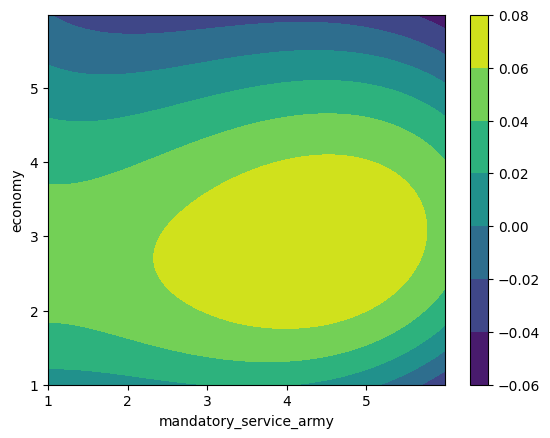

In [8]:
X = np.arange(x_min, x_max+1, 1/100)
Y = np.arange(y_min, y_max+1, 1/100)
X, Y = np.meshgrid(X, Y)
fig, ax = plt.subplots()
cont = ax.contourf(X, Y, Z_pred.reshape(X.shape))
fig.colorbar(cont)
x_label, y_label = list(policies)
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)

plt.show()

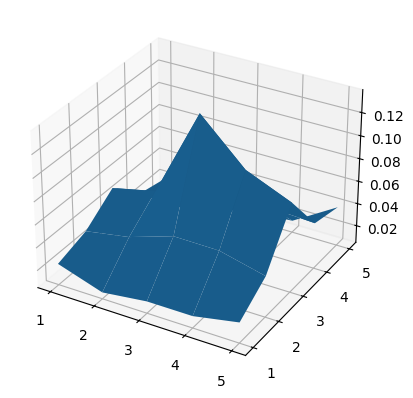

In [9]:
X = np.arange(x_min, x_max+1)
Y = np.arange(y_min, y_max+1)
X, Y = np.meshgrid(X, Y)
ax = plt.figure().add_subplot(projection="3d")
surf = ax.plot_surface(X, Y, Z.reshape(5,5))

plt.show()

<Axes: ylabel='Frequency'>

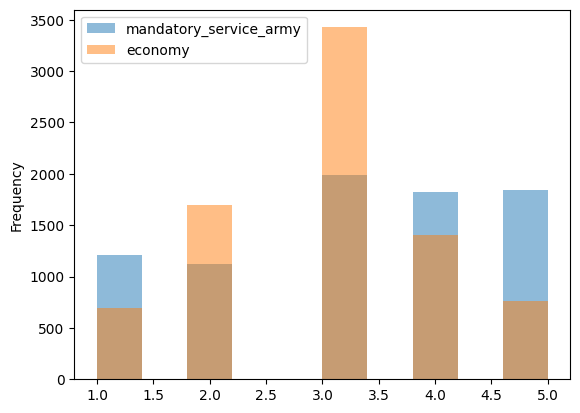

In [10]:
df.plot.hist(alpha=0.5)